In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Identity metrics

In [51]:
identity_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/identity_ood_metrics_encoded_BXPC3_IFNG.csv",
                              index_col=0)

In [52]:
identity_metrics.mean(1)

r_squared            0.933890
sinkhorn_div_1      15.871305
sinkhorn_div_10      5.226308
sinkhorn_div_100     3.346924
e_distance           6.499990
mmd                  0.014227
dtype: float64

CellFlow

In [53]:
cellflow_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/cellflow_ood_metrics_encoded_BXPC3_IFNG.csv",
                              index_col=0)

In [54]:
cellflow_metrics.mean(1)

r_squared            0.894892
sinkhorn_div_1      20.262928
sinkhorn_div_10      9.489322
sinkhorn_div_100     7.065222
e_distance          13.733126
mmd                  0.030209
dtype: float64

Metrics

In [55]:
mean_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/mean_train_metrics_encoded_BXPC3_IFNG.csv",
                              index_col=0)

In [56]:
mean_metrics.mean(1)

r_squared            -0.730125
sinkhorn_div_1      121.107389
sinkhorn_div_10     110.462325
sinkhorn_div_100    108.582921
e_distance          216.970816
mmd                   0.247511
dtype: float64

## Get gene list by distance from the controls 

In [57]:
identity_deg = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/identity_ood_metrics_deg_BXPC3_IFNG.csv",
                              index_col=0)

In [58]:
gene_list = identity_deg.T.sort_values(by="r_squared")
gene_list["perturbation"] = gene_list.index.copy()
gene_list = gene_list.reset_index(drop=True)

In [59]:
n_splits = 5
gene_list["Perturbation effect"] = None

range_cond = np.arange(len(gene_list))
range_cond_split = np.array_split(range_cond,n_splits)
for i, idx_list in enumerate(range_cond_split):
    gene_list.loc[idx_list, "Perturbation effect"] = i
gene_list = gene_list.set_index("perturbation") 

# Plot comparisons

In [60]:
merged = pd.concat([identity_metrics, mean_metrics, cellflow_metrics], axis=1).T

In [61]:
merged["Model"] = ["Identity"]*identity_metrics.shape[1] + ["Mean"]*identity_metrics.shape[1] + ["cellFlow"]*cellflow_metrics.shape[1]

In [62]:
perturbation_cat = []
for pert in merged.index:
    perturbation_cat.append(gene_list.loc[pert, "Perturbation effect"])
merged["Perturbation effect"] = perturbation_cat

In [63]:
pathways = []
cell_lines = []

for cat in merged.index:
    cell_line, pathway, _ = cat.split("_")
    pathways.append(pathway)
    cell_lines.append(cell_line)

In [64]:
# merged["pathway"] = pathways
# merged["cell_line"] = cell_lines
# merged = merged.loc[merged.pathway=="IFNG"]

In [65]:
merged

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd,Model,Perturbation effect
BXPC3_IFNG_ATF3,0.988297,11.064507,1.682369,0.802616,1.530037,0.004466,Identity,4
BXPC3_IFNG_ATF5,0.990208,11.949556,1.823627,0.637592,1.218479,0.004108,Identity,3
BXPC3_IFNG_BATF2,0.987294,12.312070,2.107090,0.880882,1.703252,0.005324,Identity,3
BXPC3_IFNG_CEBPB,0.977679,13.963309,3.287434,1.482883,2.858195,0.007863,Identity,3
BXPC3_IFNG_CLK1,0.987492,14.718393,3.510284,1.032112,1.870986,0.009676,Identity,0
...,...,...,...,...,...,...,...,...
BXPC3_IFNG_TBX21,0.911556,16.785076,6.640335,5.085739,9.917276,0.022287,cellFlow,4
BXPC3_IFNG_TRAFD1,0.881243,22.577106,11.203094,8.185024,16.031616,0.035179,cellFlow,1
BXPC3_IFNG_ZFP36,0.865507,24.091625,12.971878,10.004841,19.640712,0.042789,cellFlow,1
BXPC3_IFNG_ZNF267,0.877904,23.326126,11.770359,8.984978,17.553630,0.040431,cellFlow,0


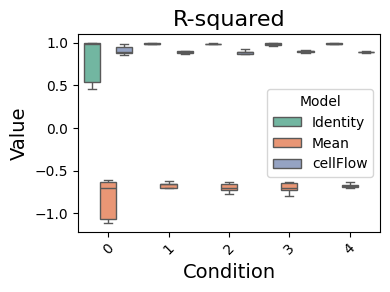

In [66]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="r_squared", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("R-squared", fontsize=16)
plt.xlabel("Condition", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

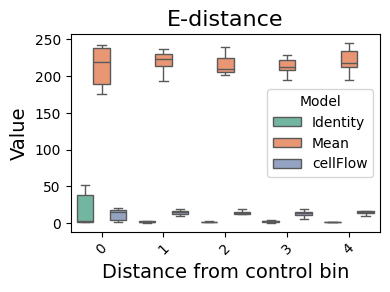

In [67]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="e_distance", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("E-distance", fontsize=16)
plt.xlabel("Distance from control bin", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [68]:
# plt.figure(figsize=(4, 3))
# sns.boxplot(x="Perturbation effect", hue="Model", y="e_distance", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("E-distance", fontsize=16)
# plt.xlabel("Distance from control bin", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [48]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="sinkhorn_div_100", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("Sinkhorn 100", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="mmd", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("MMD", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
s